# TASK-2

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
import tensorflow as tf  
from PIL import Image
import pandas as pd
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#GridSearchCV
from sklearn.model_selection import GridSearchCV

# Load and Pre-Process Data

In [3]:
#Reading the images.
import os

# Load and preprocess the data
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    return int(file_name.split('.')[0].replace('subject', '')) - 1  # Subtract 1 to make labels start from 0

# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = 'E:\\archive (1)\\data'

for file_name in os.listdir(dataset_dir):
    img = plt.imread(os.path.join(dataset_dir, file_name))
    data.append(img.flatten())  # Flatten image into a 1D array
    labels.append(extract_person_label(file_name))

In [4]:
data = np.array(data)
labels = np.array(labels)

# Splitting the Data into Train and Test

In [5]:
#Setting up the random state
np.random.seed(42)
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2)

In [6]:
print(f"The Training splits are : ({len(X_train)},{len(Y_train)})")
print(f"The Testing splits are : ({len(X_test)},{len(Y_test)})")

The Training splits are : (132,132)
The Testing splits are : (33,33)


# Fitting the Model

In [44]:
#Using Scikit learn
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
        }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

# Score on the given Models

In [45]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)

model_scores

{'Logistic Regression': 1.0, 'KNN': 0.8484848484848485, 'Random Forest': 1.0}

<Figure size 800x600 with 0 Axes>

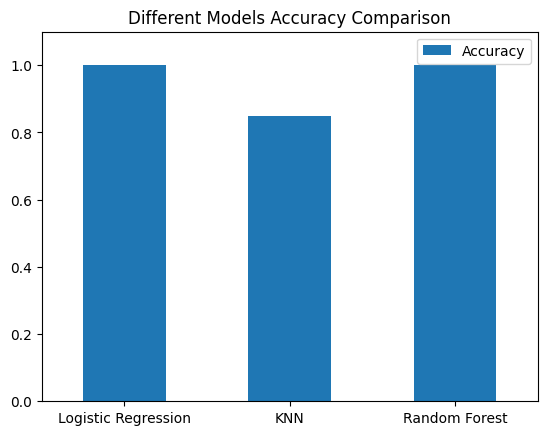

In [67]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
# Create a bar plot
plt.figure(figsize=(8, 6))
ax = model_compare.T.plot.bar()
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Different Models Accuracy Comparison')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

 # Grid Search CV ON K-Nearest Neighbours

In [65]:
np.random.seed(42)

# Define the hyperparameter grid for KNN
KNN_grid = {
    'n_neighbors': [3, 5, 7],  # Values to try for the number of neighbors
    'weights': ['uniform', 'distance'],  # Values to try for the weight function
    'metric': ['euclidean', 'manhattan']  # Values to try for the distance metric
}

# Setup random hyperparameter search for KNeighborsClassifier
GridSearch_KNN = GridSearchCV(KNeighborsClassifier(),
                              param_grid=KNN_grid,
                              cv=5,
                              verbose=True)

# Fit random hyperparameter search model for KNeighborsClassifier
GridSearch_KNN.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [77]:
print(f"Accuracy of KNN with GridSearchCV --> {GridSearch_KNN.score(X_test, Y_test)}")

Accuracy of KNN with GridSearchCV --> 0.9090909090909091


# KNN with Hyper-Parameter Tuning and Without Hyper-Parameter Tunning
   1. WITH HYPERPARAMETER TUNING
   2. WITHOUT HYPERPARAMETER TUNING

<Figure size 400x400 with 0 Axes>

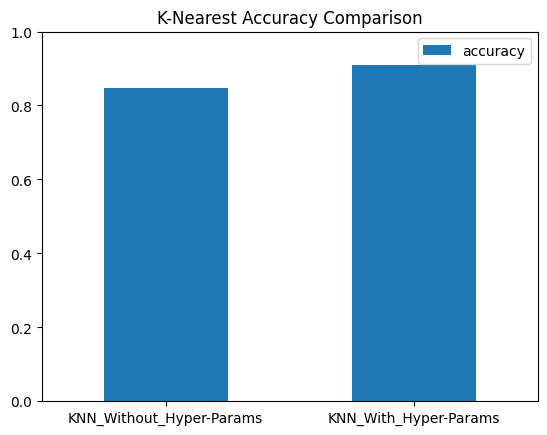

In [74]:
KNN_scores_DICT={
                 "KNN_Without_Hyper-Params":0.8484848484848485,
                 "KNN_With_Hyper-Params": 0.9090909090909091
                }
model_compare = pd.DataFrame(KNN_scores_DICT, index=["accuracy"])
# Create a bar plot
plt.figure(figsize=(4, 4))
ax = model_compare.T.plot.bar()
plt.ylim(0, 1)  # Set the Y-axis range to 0-1
plt.title('K-Nearest Accuracy Comparison')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Evaluating Model on Different Metrices

In [103]:
y_preds=GridSearch_KNN.predict(X_test)

In [104]:
Y_test

array([12, 10, 11,  5,  8,  2, 14,  4,  9, 13,  1,  7,  1,  6,  2,  2, 12,
        9, 13,  1,  6,  1,  1,  0,  2, 14,  8,  5, 12, 14, 12,  7,  5])

In [105]:
y_preds

array([ 6, 10, 11, 13,  8,  2, 14,  4,  9, 13,  1,  7,  1,  9,  2,  2, 12,
        9, 13,  1,  6,  1,  1,  0,  2, 14,  8,  5, 12, 14, 12,  7,  5])

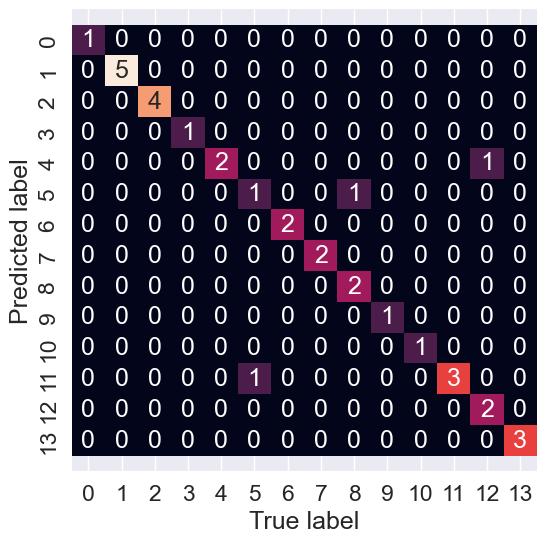

In [106]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(Y_test, y_preds)

In [107]:
accuracy = accuracy_score(Y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print precision
precision = precision_score(Y_test, y_preds, average='macro')
print(f"Precision: {precision:.2f}")

# Calculate and print F1 score
f1 = f1_score(Y_test,y_preds, average='macro')
print(f"F1 Score: {f1:.2f}")

recall = recall_score(Y_test, Y_preds, average='macro')
print(f"Recall: {recall:.2f}")

Accuracy: 0.91
Precision: 0.92
F1 Score: 0.91
Recall: 1.00


<Figure size 400x300 with 0 Axes>

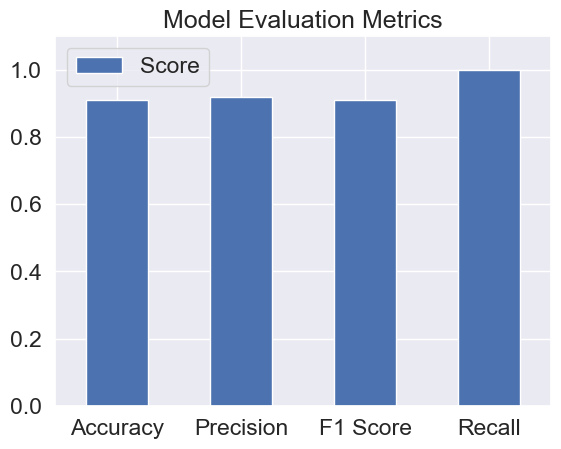

In [115]:
Metrics_dict={
              "Accuracy": 0.91,
              "Precision": 0.92,
              "F1 Score": 0.91,
              "Recall": 1.00    
}
model_compare = pd.DataFrame(Metrics_dict, index=["Score"])
# Create a bar plot
plt.figure(figsize=(4, 3))
ax = model_compare.T.plot.bar()
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Evaluating RandomForest on Different Metrices

In [116]:
y_preds=model.predict(X_test)

In [117]:
y_preds

array([12, 10, 11,  5,  8,  2, 14,  4,  9, 13,  1,  7,  1,  6,  2,  2, 12,
        9, 13,  1,  6,  1,  1,  0,  2, 14,  8,  5, 12, 14, 12,  7,  5])

In [118]:
Y_test

array([12, 10, 11,  5,  8,  2, 14,  4,  9, 13,  1,  7,  1,  6,  2,  2, 12,
        9, 13,  1,  6,  1,  1,  0,  2, 14,  8,  5, 12, 14, 12,  7,  5])

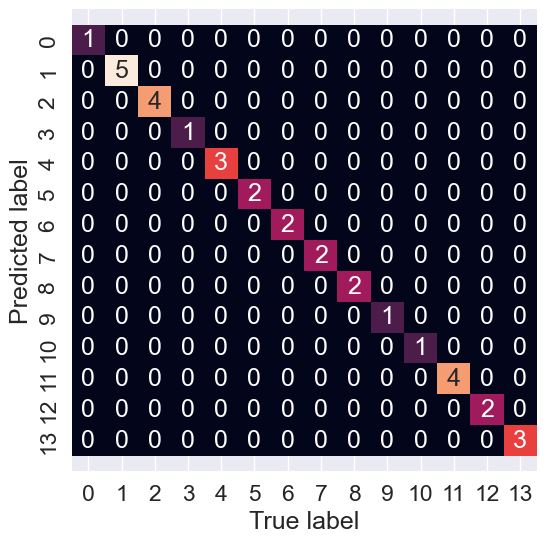

In [119]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(Y_test, y_preds)

In [120]:
accuracy = accuracy_score(Y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print precision
precision = precision_score(Y_test, y_preds, average='macro')
print(f"Precision: {precision:.2f}")

# Calculate and print F1 score
f1 = f1_score(Y_test,y_preds, average='macro')
print(f"F1 Score: {f1:.2f}")

recall = recall_score(Y_test, Y_preds, average='macro')
print(f"Recall: {recall:.2f}")

Accuracy: 1.00
Precision: 1.00
F1 Score: 1.00
Recall: 1.00


<Figure size 400x300 with 0 Axes>

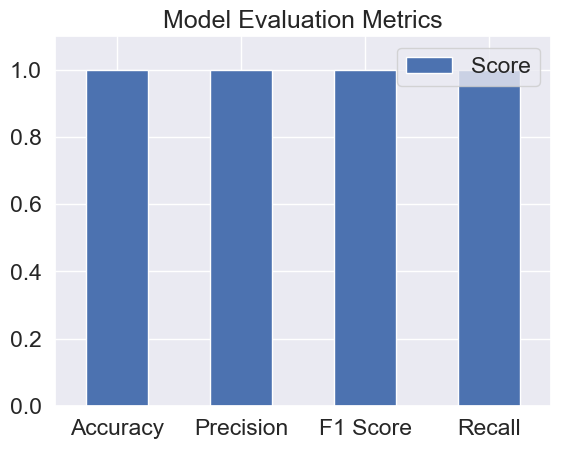

In [121]:
Metrics_dict={
              "Accuracy": 1.00,
              "Precision": 1.00,
              "F1 Score": 1.00,
              "Recall": 1.00    
}
model_compare = pd.DataFrame(Metrics_dict, index=["Score"])
# Create a bar plot
plt.figure(figsize=(4, 3))
ax = model_compare.T.plot.bar()
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()